## Emphasis:

Probability:

- Events
- Union  A or B
- Intersection A and B
- Conditional Probability 
    - P(A|B) which reads "Probability of A given B has occurred"
- Calculating probability of event, weighted on other events
    - Independent Events
    - Mutually Exclusive Events
- Conditional Expectation

    

## Key Terminology

### Union: (Or: A or B or Both A and B)

#### P(A or B) = P(A) + P(B) - P(AB) 

Think of a Venn Diagram, we counted the middle twice and thus have to subtract to compensate

https://turnthewheel.files.wordpress.com/2012/09/union.jpg

### Intersection: A and B.  Both Events Occur

#### P(AB)


https://share.ehs.uen.org/sites/default/files/images/AlgII_4l2.13_image1.png

http://images.slideplayer.com/15/4547296/slides/slide_13.jpg

### Independent Events: By definition A and B are independent if P(AB) = P(A)*P(B)



### Independent events:  Knowledge of 1 does not impact the probabilty of the other.  For Independent Events:   P(AB) = P(A)P(B)

Example:  Roll two dice.  The value of the first die does not provide information about the probability of the 2nd vs....

### Dependent events:  Knowledge of 1 DOES impact the probabilty of the other. 

Example:  Pull a card from a deck of cards.  It is red and not replaced in the deck.  The probability the first card is red is 1/2.  But the probability the second is red is 25/51.  


### Mutually Exclusive Events: A and B are mutually exclusive if they cannot both occur simultaneously.  Mutually Exclusive Events: P(AB) = 0

Mutually Exclusive Events: P(A and B) = 0

##### Note:  more key concepts under conditional probability below

In [7]:
import pandas as pd
import numpy  as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import sympy as sy
from scipy.integrate import quad

%matplotlib inline

//anaconda/envs/dsi/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Events:

    Red = Card color is Red
    Black = Card color is Black
    
    n = Card id number n, n = 2,10,J,Q,K,A 
    
    Suit = Card is of suit: Heart, Diamond, Club, Spade 


Some probabilities: Random Card:  P(K), P(7), P(K|7), P(KDiamond) (king and a diamond)

In [8]:
P_K = 4/52.
print "P(K): ",P_K

P(K):  0.0769230769231


In [9]:
P_7 = 4/52.
print "P(7): ",P_7

P(7):  0.0769230769231


In [10]:
PK_7 = 0
# Probability it is a K given it is a 7 is zero
print "P(K|7): ",PK_7

P(K|7):  0


In [11]:
PKD = 1/52.
print "P(KD): ",PKD
#one king of diamonds in k2 cards

P(KD):  0.0192307692308


Now let's do similar problems and tie in the concepts.

Find:  P(K and Diamonds), P(K or 3), P(Q or Blck), P(Red and Club)

Independent Events:  P(A and B) = P(A) * P(B)

In [12]:
#one KD in the deck.....
p = 1./52
print "P(KD): ",p
# but using the  fact that knowing the suit does not tell you any information
# about the rank (or vice versa) P(KD) = P(K)*P(D)
p = (1./13)*(1./4)
print "Since Suit and Rank are Independent P(KD) = P(K)*P(D): ",p

P(KD):  0.0192307692308
Since Suit and Rank are Independent P(KD) = P(K)*P(D):  0.0192307692308


Probability Union:  P(A or B) = P(A) + P(B) - P(A and B) 

Mutually Exclusive:  P(A and B) = 0

In [13]:
pk = 4./52
p3 = 4./52
pk3 = 0 # can't be both

print "P(K or 3) = P(K) + P(3) - P(K3) = :",pk + p3 - pk3

# or since there are 8 cards in the deck that are K or 3...


print "alternatively: P(K or 3)  = 8/52 : ", 8./52

P(K or 3) = P(K) + P(3) - P(K3) = : 0.153846153846
alternatively: P(K or 3)  = 8/52 :  0.153846153846


Probability Union: P(A or B) = P(A) + P(B) - P(A and B)

Independent Events:  P(AB) = P(A)P(B)

====> for Independent Events: P(A or B) = P(A) + P(B) - P(A)P(B)

In [14]:
pq = 4./52
pb = 26./52
pqb = (4/52.) * (26./52) # using rank and suit independence:  Knowledge of one
# says nothing about the other

print "P(Q or B) = P(Q) + P(B) - P(QB) = :",pq + pb - pqb

# or since there are 8 cards in the deck that are K or 3...

print "alternatively: P(Q or b) = 28/52  :", 28./52

P(Q or B) = P(Q) + P(B) - P(QB) = : 0.538461538462
alternatively: P(Q or b) = 28/52  : 0.538461538462


Mutually Exclusive:  P(AB) = 0

In [15]:
print "P(Red and Club) =  = :",0.

# Note suit and color are NOT independent.  If you know the suit, you know the color
# if you know the color, it changes the probability of a suit. Red and Club are Mutually exclusive

P(Red and Club) =  = : 0.0


### Conditional Probability

Conditional Probability measues the probability of an event (Say A) given that another event has occcurred.  It is written as

#### P(A|B) (read "Probability of A given B")

#### Prior Probability  (a priori):  In this context P(A) is sometimes known as the prior probabality (Prior to any additional knowledge)

#### Posteri (a posteriori) P(A|B) "ie given knowledge", to what has as probabability of A  changed

Note that conditional probablity might be larger, the same, or less than the prior
distributions

https://en.wikipedia.org/wiki/Conditional_probability#/media/File:Conditional_probability.svg


### P(A|B) = P(AB) / P(B)

https://en.wikipedia.org/wiki/Conditional_probability#/media/File:Conditional_probability.svg

One way to understand the intuition for this formula is to think of of the relative weights between AB and B.  Now that b occurs the sample space has changed.   A given B will be relative to the new sample space.

https://s3.amazonaws.com/classconnection/156/flashcards/10492156/jpg/conditional_probability-152F061E62D501DF63E.jpg

Another way to build intuition for this formula is to consider P(AB).  To calulate this probability, B must occur and then given B, A must occur.

Thus: 

###  P(A|B)P(B) = P(AB) = P(B|A)P(A)

Note the relationshiop between P(A|B) and P(B|A) known as Bayes Theorem:

### P(A|B) = P(AB)/P(B) = (P(B|A) * P(A)) / P(B)

this is sometimes written as 

### P(A|B) = (P(B|A)/ P(B)) * P(A) 

i.e. Posterior is proportional to Prior 



Draw a card from a deck of cards.  Determine the prior probabilty that the card is black.   Suppose a second card is exposed from the remaining deck (i.e. no replacement) and it is red.   What is the posterior (aka conditional) probability that card 1 is black given card 2 is red?

In [34]:
# Let A be a Red card event, B a black card
prior = 26/52.
p_b = 26/52.
p_b_given_a = 26/51.
posterior = (p_b_given_a/p_b)*prior

print "P(Black | Red Card Shown) = P(Red Card Shown | Black) / (P(Red Card Shown)) * P(Black)",posterior

print "Posterior / Prior Ratio: ", posterior / prior


P(Black | Red Card Shown) = P(Red Card Shown | Black) / (P(Red Card Shown)) * P(Black) 0.509803921569
Posterior / Prior Ratio:  1.01960784314


Conditional expectation is a probability weighted sum.  The difference is that the probability weights are conditional proababilities.  

Game: Flip a coin.  It it his heads, you get to roll a single die.   You will be paid 2 times the value on the die if it is odd.  If the coin is tails, you will get 2 dollars.    A head and an odd roll will result in no payout.  The coin is not fair, but does flip a tail 40% of the time.

Let Z be the expected payout: Determine the sample space for Z, the probability Z = 2, weighted by the coin probability: P(Z = 2), E[Z | Tail], E[Z | Head]


In [39]:
ptail = .4
phead = 1-ptail

# Given a tail
Z_outcomes_T = [2]
Z_prob_given_T = [1.]
Ezt = np.dot(Z_outcomes_T,Z_prob_given_T)

# Given a head
Z_outcomes_H = [0,2,6,10]
Z_prob_given_H = [.5,1/6.,1/6.,1/6.]
Ezh = np.dot(Z_outcomes_H,Z_prob_given_H)

P2 = ptail * Z_prob_given_T[0] + phead*Z_prob_given_H[1]

print "P(Z=2):    ", P2
print "E[Z|Tail]: ",Ezt
print "E[Z|Head]: ",Ezh


P(Z=2):     0.5
E[Z|Tail]:  2.0
E[Z|Head]:  3.0


Key point: you can calculate the Expected value of a random variable by weighting the conditional expectations.   The notatation is E[E[Z|k]].  We sum across all values of k and multiply by the associated probability pk. (integrate if continuous)

Calculate E[Z} using conditional Expectation


In [17]:
ez = Ezt * ptail + Ezh * phead
print "E[Z] = E[Z|Head]*P(head) + E[Z|Tail]*P(head): ", ez

E[Z] = E[Z|Head]*P(head) + E[Z|Tail]*P(head):  2.6


run an experiment and compare expected value to sample value

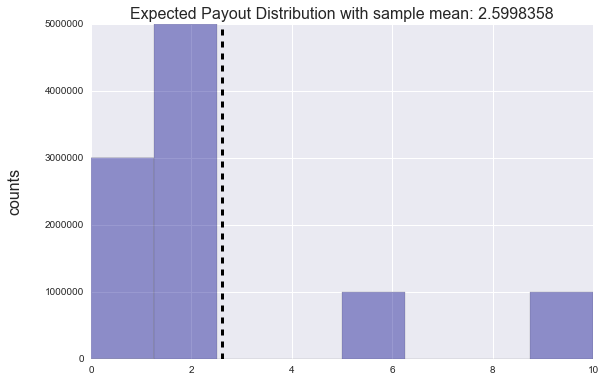

In [18]:
#coin flips

flips = 10000000

#die roll variables
high = 6
low = 1
n = high-low+1

#coin
tail_payoff = 2.
die_multiplier = 2.


x = np.random.binomial(1,ptail,flips)
y = np.random.randint(low,high+1,size=flips)
z_payout = []
for z in range(0,flips):
    if x[z] == 1: #tail
        z_payout.append(2.)
    else:
        if (y[z] % 2) == 0:
            z_payout.append(0.)
        else:
            z_payout.append(die_multiplier * y[z])
            
z_mean = np.mean(z_payout)

Title = 'Expected Payout Distribution with sample mean: ' + str(z_mean)
        
fig = plt.figure(figsize=(9,6))
ax = fig.gca()
ax = sns.distplot(z_payout, bins=8, hist=True, kde=False,
                   ax=ax,color='darkblue')
ax.set_ylabel('counts\n', fontsize=16)
ax.set_title(Title, fontsize=16)
ax.axvline(z_mean, lw=3, ls='dashed', color='black')
plt.show()
